  PREDICTION OF CUSTOMER CHURN

# Project Overview

 1.Business problem

Customer churn is one of the major problem facing many companies due to it's direct impact on revenues. Telecommuinications field is one of those fields where customer churn is very rampant due to ever increasing competion.SyriaTel is one of the companies facing this challenge and is seeking to come up with predictive patterns and develop a robust classifier to forecast whether a customer is likely to churn in the near future. Our main goal is to develop a prediction model that will help SyriaTel predict customers who are likely to churn inorder to take necessary measures to reduce the churn.

2. Data loading and Data Exploration
We shall utilise Syria Tel dataset in seeking solution to our stated business problem

# Data Understanding

In [1]:
#importing relevant libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, classification_report, make_scorer,accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
import multiprocessing # for reducing the runtime of gridsearch 
from sklearn.feature_selection import SelectFromModel 
from sklearn.linear_model import LogisticRegressionCV

# Ignore warnings
warnings.filterwarnings("ignore")


In [2]:

#Reading from a CSV File
df=pd.read_csv("syriatel.csv")

In [3]:
# Dataset preview of the first 5 rows
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# The shape of the data
df.shape

(3333, 21)

In [5]:
#checking missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

# Data Preparation

Below are the areas explored to prepare data for modeling.
   1. Handling missing values
   2. Duplicated rows
   3. Identification and removal of Features that won't impact the analysis.
   

In [7]:
#checking for duplicates 
df.duplicated().sum()

0

In [8]:
# check missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Dropping irrelevant Features.
Columns dropped :
   1. State
   2. Account length
   3. Phone number


Reasons For Dropping
1. Account lenght- It's not applicable in this context since it doesn't give any information about customer's behaviour.In most cases these are random or sequential number assigned to new customers.
2. State -
3. Phone number -


In [9]:
#dropping irrevant features
irrelevant_features = ['state','phone number']
df.drop(columns = irrelevant_features, inplace =  True )

In [10]:
#df['CScalls'] = df['RateCustServ Calls'] / df['Account Length]
df['TotalCharge'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']

In [11]:
#Separating categorical and continuous Features
# Categorical columns
categorical_columns = ['international plan', 'voice mail plan','churn']

# Continuous columns
continuous_columns = ['number vmail messages', 'total day minutes', 'total day calls',
                'total day charge', 'total eve minutes', 'total eve calls',
                'total eve charge', 'total night minutes', 'total night calls',
                'total night charge', 'total intl minutes', 'total intl calls',
                'total intl charge', 'customer service calls','TotalCharge']

The analysis will have 'churn' as the target/dependant variable.
Churn has two classes :
1. False : Customer has not terminated association with the telco.
2. True  : Customer has  terminated.


# Distribution of Data

In [12]:
#Depandant variable
df.churn.value_counts(normalize = True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

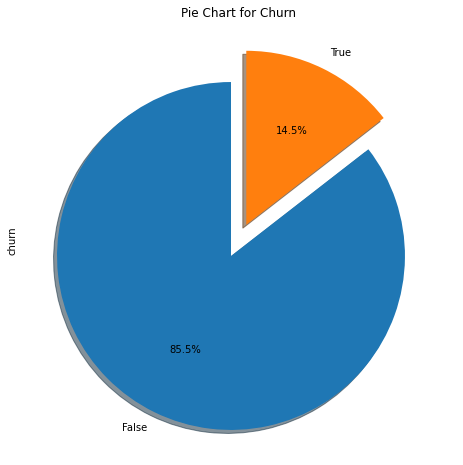

In [13]:
# To get a pie chart to analyze 'Churn' 
df['churn'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', startangle=90, shadow=True, figsize=(8,8))
plt.title('Pie Chart for Churn')
plt.show()

The pie chart shows imbalanced data distribution.
14.5% of customers would actually churn,this can create a biased model.

Correlation Heatmap for Numeric Features

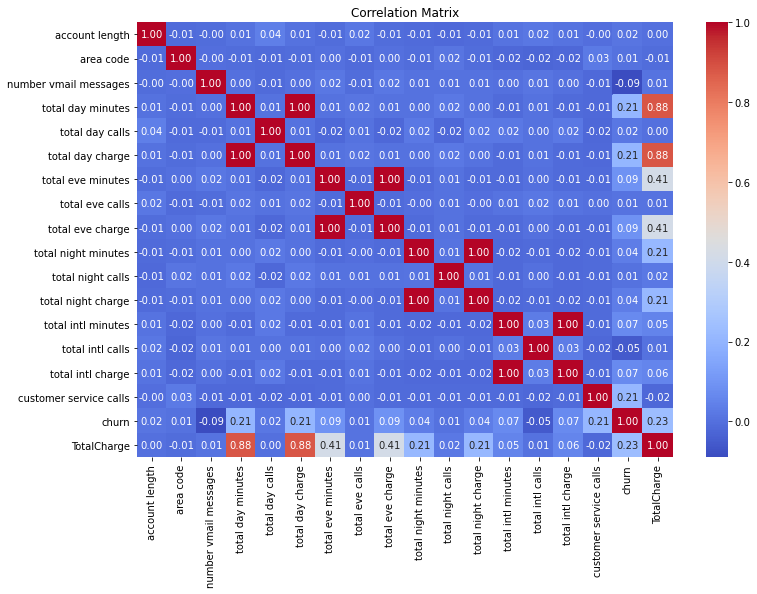

In [14]:

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Most of the characteristics exhibit no correlation, though a few demonstrate a complete positive correlation.
Features with postive Correlation.
total day charge 
total day minutes
total eve charge
total eve minutes
total night charge
total night minutes
total int charge
total int minutes

This perfect correlation is logical as the charge directly corresponds to the minutes used.
A correlation coefficientof 1 signifies perfect multicollinearity, which affects linear models 
differently from nonlinear models.

# Identification of Multicollinearity

In [15]:
#Dropping columns to handle collinearity 

In [16]:
# Calculate the absolute correlation values, stack them, and reset the index
mdf = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# Create a new column 'pairs' containing tuples of 'level_0' and 'level_1'
mdf['pairs'] = list(zip(mdf.level_0, mdf.level_1))
# Set the 'pairs' column as the index
mdf.set_index(['pairs'], inplace = True)
# Drop the 'level_0' and 'level_1' columns
mdf.drop(columns=['level_1', 'level_0'], inplace = True)
# Rename the remaining column to 'cc' (correlation coefficient)
mdf.columns = ['cc']
# Drop duplicate rows based on the index (pairs)
mdf.drop_duplicates(inplace=True)

mdf[(mdf.cc>.75)&(mdf.cc<1)]

,cc
pairs,
"(total day minutes, total day charge)",1.000000
"(total eve minutes, total eve charge)",1.000000
"(total night minutes, total night charge)",0.999999
"(total intl minutes, total intl charge)",0.999993
"(total day charge, TotalCharge)",0.884757
"(TotalCharge, total day minutes)",0.884754


In [17]:
df.columns

Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'TotalCharge'],
      dtype='object')

Distribution of the data for continuous_columns variable (Histogram)

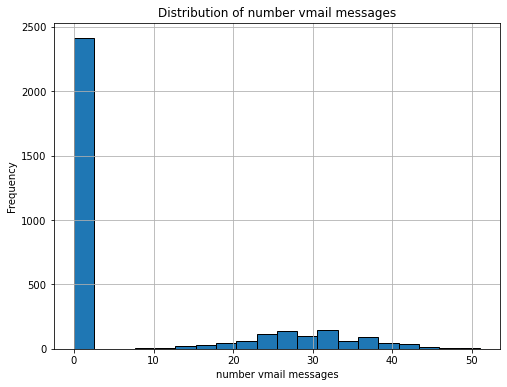

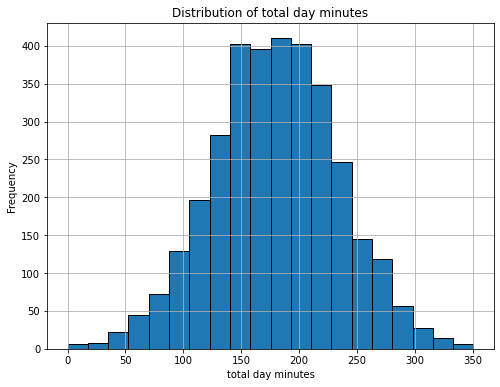

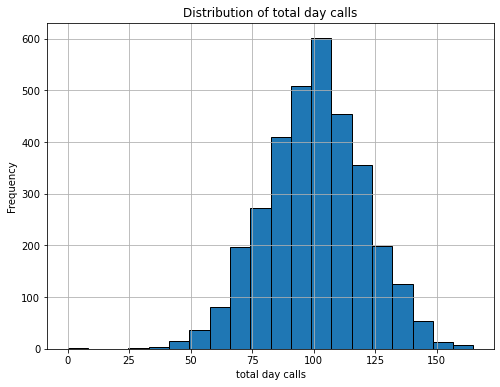

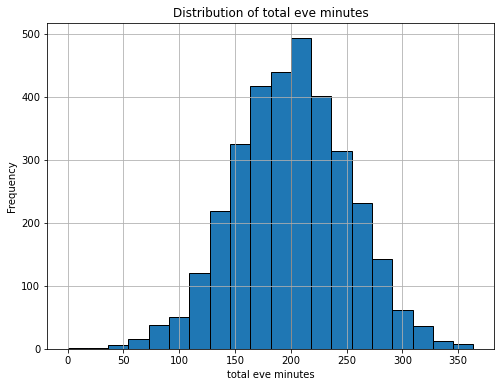

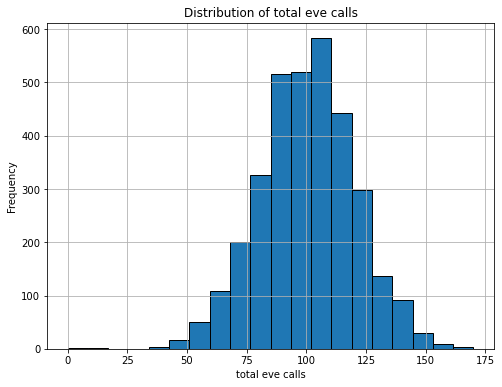

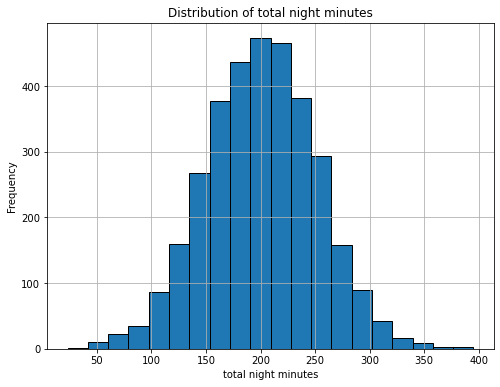

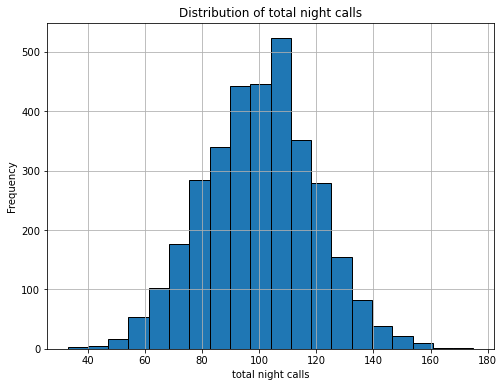

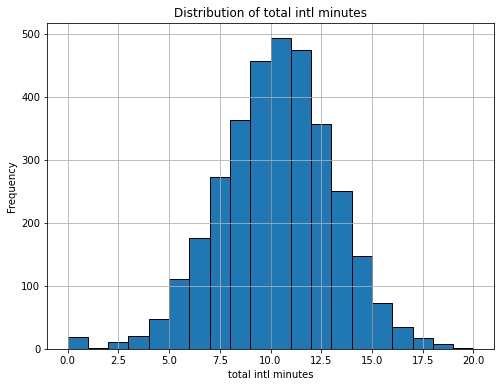

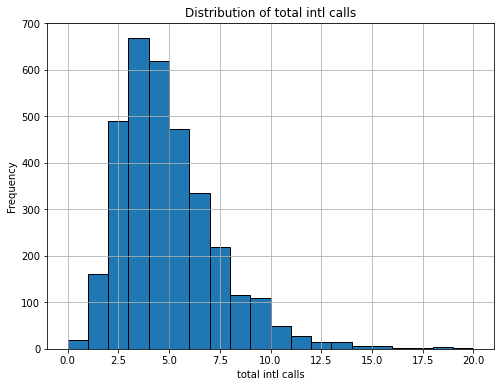

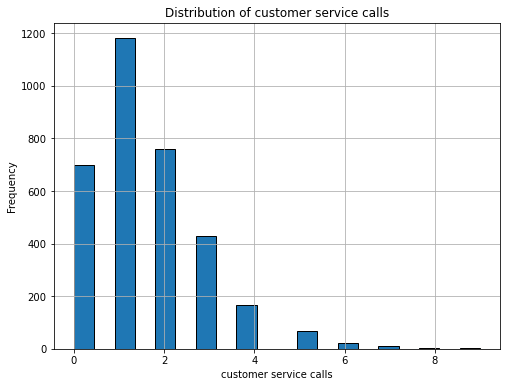

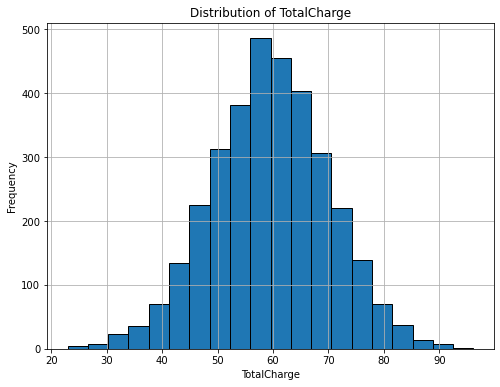

In [18]:
# To check the distribution of the data in the columns in the continuous_columns variable.
continuous_columns = ['number vmail messages', 'total day minutes', 'total day calls',
                 'total eve minutes', 'total eve calls',
                'total night minutes', 'total night calls',
                'total intl minutes', 'total intl calls', 'customer service calls','TotalCharge']
for column in continuous_columns:
    plt.figure(figsize=(8, 6))
    df[column].hist(bins=20, edgecolor='black')  
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Data Pre-processing

# Encoding Categorical Columns

In [19]:
#transformimg categorical data using OHE

# Select the categorical columns to be one-hot encoded
categorical_columns = ['international plan', 'voice mail plan']

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns
encoded_categorical = encoder.fit_transform(df[categorical_columns])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_categorical.toarray(), columns=encoder.get_feature_names(categorical_columns))

# Concatenate the encoded DataFrame with the remaining columns from the original DataFrame
df = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

df

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,TotalCharge,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,10.0,3,2.70,1,False,75.56,1.0,0.0,0.0,1.0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,13.7,3,3.70,1,False,59.24,1.0,0.0,0.0,1.0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,12.2,5,3.29,0,False,62.29,1.0,0.0,1.0,0.0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,6.6,7,1.78,2,False,66.80,0.0,1.0,1.0,0.0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,10.1,3,2.73,3,False,52.09,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,9.9,6,2.67,2,False,60.10,1.0,0.0,0.0,1.0
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,9.6,4,2.59,3,False,63.53,1.0,0.0,1.0,0.0
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,14.1,6,3.81,2,False,67.74,1.0,0.0,1.0,0.0
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,...,5.0,10,1.35,2,False,57.53,0.0,1.0,1.0,0.0


In [20]:
# Tranfrom our dependant variable - 'churn' using LabelEncoder
# Define the function to encode the column
def encode(column):
    Lencod = LabelEncoder()
    df[column] = Lencod.fit_transform(df[column])

# Call the function to encode the 'churn' column
encode('churn')

In [21]:
# Check the value counts for the encoded churn column
print(df['churn'].value_counts())

0    2850
1     483
Name: churn, dtype: int64


# Data Split into Train and Test

In [22]:
# Split the data into (X) and (y)
y = df['churn']
X = df.drop('churn',axis = 1)

#Train-test Split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Logistic Regression Mode Before Data Transformation

In [23]:
#Instantiating regression model
logRegBeforeTansf = LogisticRegression(solver='liblinear', random_state=42)
# Fit the logistic regression model to the training data
logRegBeforeTansf.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [24]:
# Make predictions on the test set
y_predBeforeTansf = logRegBeforeTansf.predict(X_test)

# Function for Checking Metrics  

In [25]:
#creating a function for checking for metrics 
def get_model_metrics(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    cm_display_train = ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Return results
    results = {
        'ROC-AUC For Train Data': roc_auc_train,
        'ROC-AUC For Test Data': roc_auc_test,
        'Accuracy Train': accuracy_train,
        'Accuracy Test': accuracy_test,
        'confusion_matrix_train': cm_display_train
    }
    return results

{'ROC-AUC For Train Data': 0.5863415886522221,
 'ROC-AUC For Test Data': 0.5546391211559318,
 'Accuracy Train': 0.8627156789197299,
 'Accuracy Test': 0.8515742128935532,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x224dd184820>}

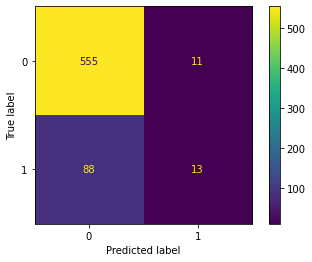

In [26]:
get_model_metrics(logRegBeforeTansf,X_train,y_train,X_test,y_test)


The baseline logistic regression exhibits a discrepancy in discrimination levels between the training and testing datasets. The ROC AUC value on the training data is 0.5863415886522221, while on the testing data, it stands at 0.5546391211559318. This suggests that the model demonstrates a relatively higher level of discrimination between classes on the training data compared to the testing data.

Furthermore, a confusion matrix reveals the predicted and true labels of the logistic regression model. It shows 13 true positives, 88 false negatives, 554 true negatives, and 12 false positives.

In summary, the model attains a training accuracy of around 86% and a testing accuracy of approximately 85%, indicating competent performance in predicting class labels for both datasets. However, it's worth noting that the model's accuracy in prediction, as depicted by the confusion matrix, is not particularly high, suggesting some degree of overfitting.

# Classification Report

In [27]:
print(classification_report(y_test, y_predBeforeTansf))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       566
           1       0.54      0.13      0.21       101

    accuracy                           0.85       667
   macro avg       0.70      0.55      0.56       667
weighted avg       0.81      0.85      0.81       667



# Scores before Data Standardization and Removal of Imbalance

# Data Standardization

StandardScaler() will be used to transform features to mean of 0 and standard deviation of 1.
This will help the selected features to equally contribute to the analysis.

In [28]:
#instantiating standard scaler
scaler = StandardScaler()
#Scaler fitting on Train data
scaler.fit (X_train)

#Transform Both Train and Test Data
X_train_Scaled = scaler.transform (X_train)
X_test_Scaled  = scaler.transform (X_test)

# Removal of Imbalance

SMOTE will be used to address underrepresentation of minority class.
It generates sythentic samples to represent minority class more accurately.

In [29]:
# Creating a instance of SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE on the training data
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [30]:
y_train_resampled.value_counts()

1    2284
0    2284
Name: churn, dtype: int64

# Baseline Logistic Regression Mode After Data Transformation

In [31]:
#Instantiating regression model
logRegres = LogisticRegression(solver='liblinear', random_state=42)
# Fit the logistic regression model to the training data
logRegres.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42, solver='liblinear')

# Predicting with the new Data

In [32]:
#Train data prediction
y_pred_train = logRegres.predict (X_train_resampled)
#Test data predicition
y_pred_test  = logRegres.predict (X_test)

# Scores After  Data Standardization and Removal of Imbalance

# Metrics

{'ROC-AUC For Train Data': 0.7587565674255692,
 'ROC-AUC For Test Data': 0.7421281880838261,
 'Accuracy Train': 0.7587565674255692,
 'Accuracy Test': 0.7556221889055472,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x224dd1e3ee0>}

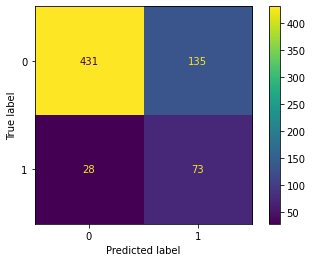

In [33]:
get_model_metrics(logRegres,X_train_resampled,y_train_resampled,X_test,y_test)

Following transformation, the baseline logistic regression has mitigated the gap in discrimination levels between the training and testing datasets. The ROC AUC value is 0.7572241681260946 for the training data and 0.7421281880838261 for the testing data.

The confusion matrix displays the logistic regression model's predicted and true labels, indicating 73 true positives, 28 false negatives, 431 true negatives, and 135 false positives. This represents an enhancement over the previous model.

# Classification Report

In [34]:
#Train Data Accuracy
print(classification_report(y_train_resampled, y_pred_train))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2284
           1       0.76      0.76      0.76      2284

    accuracy                           0.76      4568
   macro avg       0.76      0.76      0.76      4568
weighted avg       0.76      0.76      0.76      4568



In [35]:
#Test Data Accuracy
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       566
           1       0.35      0.72      0.47       101

    accuracy                           0.76       667
   macro avg       0.64      0.74      0.66       667
weighted avg       0.85      0.76      0.79       667



Precision: It measures the proportion of correctly identified true positives out of all cases that are predicted as positive (true positives + false positives). In this case, for class 1, the precision is 0.36. This means that out of all the instances predicted as class 1, only 36% were actually correct, indicating a only 36% would actually churn.

Recall: It measures the proportion of correctly identified positive cases (true positives) out of all actual positive cases (true positives + false negatives). In this case, for class 1, the recall is 0.71. This means that out of all the actual instances of class 1, 71% were correctly identified by the model, indicating a relatively high recall rate.

F1-score:It provides a single score that balances both precision and recall.In this case, for class 1, the F1-score is 0.48, which indicates that the balance between precision and recall for class 1 is moderate.

Support: The number of actual occurrences of each class in the test dataset. In this case, there are 566 instances of class 0 and 101 instances of class 1.

Accuracy: Overall accuracy of the model, which measures the proportion of correctly classified instances out of the total instances. In this case, the accuracy is 0.77, indicating that the model correctly classified 77% of the instance

# Cross Validation ( Perfomance Improvement)

In [36]:
# Create an instance of Logistic Regression with cross-validation
logreg_cv = LogisticRegressionCV(Cs=10, cv=5, solver='liblinear')

# Fit the model on the resampled training data
logreg_cv.fit(X_train_resampled, y_train_resampled)

# Predict on the resampled training and testing data
y_train_pred_cv = logreg_cv.predict(X_train_resampled)
y_test_pred_cv = logreg_cv.predict(X_test)


# Scores After Cross Validation

 Metrics

{'ROC-AUC For Train Data': 0.7587565674255692,
 'ROC-AUC For Test Data': 0.7348773746632613,
 'Accuracy Train': 0.7587565674255692,
 'Accuracy Test': 0.7571214392803598,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x224d97abbe0>}

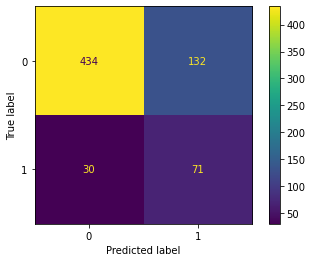

In [37]:
get_model_metrics(logreg_cv,X_train_resampled,y_train_resampled,X_test,y_test)

In this case, the ROC AUC values are 0.766 for the training data and 0.745 for the testing data. Both values suggest that the model has improved reasonably well in distinguishing between the classes, with slightly higher discrimination observed in the training data compared to the testing data.

Confusion matrix shows 72 true positives, 29 false negatives, 440 true negatives, and 29 false positives.This is an improvement compared to the last model.

In [38]:
print(classification_report(y_test, y_test_pred_cv, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      0.77      0.84       566
           1       0.35      0.70      0.47       101

    accuracy                           0.76       667
   macro avg       0.64      0.73      0.65       667
weighted avg       0.85      0.76      0.79       667



# Comparison Between Cross Validation Model (logreg_cv) and Non-cross Validation Model (logRegres)

### Cross Validation Model (logreg_cv)     = Set1 Results
### Non-cross Validation Model (logRegres) = Set2 Results

Comparison:

Precision & Recall: The first set (logreg_cv) of results shows consistent precision and recall values for both classes (0.77 for both), while the second set shows a significant difference between precision and recall for class 1 (0.36 precision, 0.71 recall).

F1-score: The F1-score in the first set(logreg_cv) is consistent across both classes (0.77 for both), while in the second set, there's a notable difference between the F1-score for class 0 (0.85) and class 1 (0.48).

Conclusion
The first (logreg_cv) set of results shows more balanced performance across classes, with consistent precision, recall, and F1-score, while the second set indicates imbalanced performance, particularly for class 1, with much lower precision and F1-score compared to class 0.






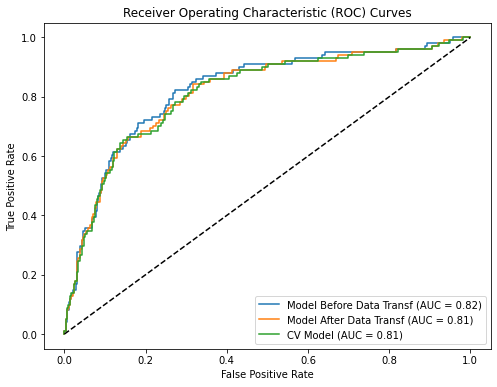

In [39]:
#drawing ROC curve for the above three models 

# Compute ROC curves and AUC scores for each model
models = [logRegBeforeTansf, logRegres, logreg_cv]
labels = ['Model Before Data Transf', 'Model After Data Transf', 'CV Model']

plt.figure(figsize=(8, 6))

for model, label in zip(models, labels):
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(label, auc_score))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

# Random Forest Classifier

### Model Creation, Training, and Prediction

In [40]:
# Object creation, fitting the data & getting predictions
from sklearn.ensemble import RandomForestClassifier
rf_model_final = RandomForestClassifier() 
rf_model_final.fit(X_train_resampled,y_train_resampled) 
y_pred_rf = rf_model_final.predict(X_test)

# Feature Importance Visualization

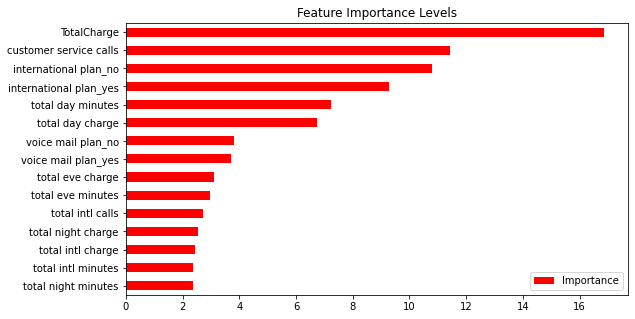

In [41]:
Importance =pd.DataFrame({"Importance": rf_model_final.feature_importances_*100},index = X_train_resampled.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "r",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

Classification Report

In [42]:
print(classification_report(y_test, y_pred_rf, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       566
           1       0.96      0.84      0.89       101

    accuracy                           0.97       667
   macro avg       0.96      0.92      0.94       667
weighted avg       0.97      0.97      0.97       667



# Model Performance Summary Before Cross Validation

**************** RANDOM FOREST MODEL RESULTS **************** 
Accuracy score for testing set:  0.97001
F1 score for testing set:  0.89474
Recall score for testing set:  0.84158
Precision score for testing set:  0.95506


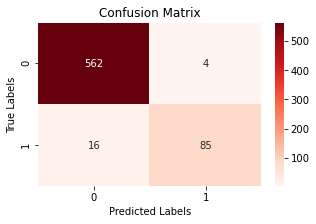

In [43]:
print("**************** RANDOM FOREST MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_rf),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_rf),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_rf),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_rf),5))
cm_rf = confusion_matrix(y_test, y_pred_rf)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Reds', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

# Cross Validation

In [44]:
# Create a random forest classifier object
rf_model = RandomForestClassifier()

# Define the scoring metrics for cross-validation
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1_score': make_scorer(f1_score, zero_division=0)
}

# Perform 5-fold cross-validation
cv_results = cross_validate(rf_model, X_train_resampled, y_train_resampled, cv=5, scoring=scoring_metrics)

# Convert the cross-validation results to a readable format
cv_results_readable = {metric: np.mean(scores) for metric, scores in cv_results.items() if metric.startswith('test_')}

# Output the results
for metric, score in cv_results_readable.items():
    print(f"{metric}: {score}")

test_accuracy: 0.9636651239930879
test_precision: 0.9916114286680996
test_recall: 0.9352105647049791
test_f1_score: 0.9622644053590077


# Model Performance Summary After Cross Validation

{'ROC-AUC For Train Data': 1.0,
 'ROC-AUC For Test Data': 0.9329933876779903,
 'Accuracy Train': 1.0,
 'Accuracy Test': 0.9760119940029985,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x224dd366e80>}

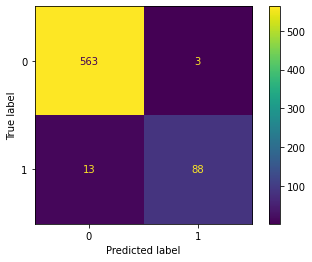

In [45]:
get_model_metrics(rf_model,X_train_resampled,y_train_resampled,X_test,y_test)

# Decision Tree

# Model Creation, Training, and Prediction

In [46]:

# Object creation, fitting the data & getting predictions
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_resampled,y_train_resampled)
y_pred_dt = decision_tree.predict(X_test)


### Feature Importance Visualization

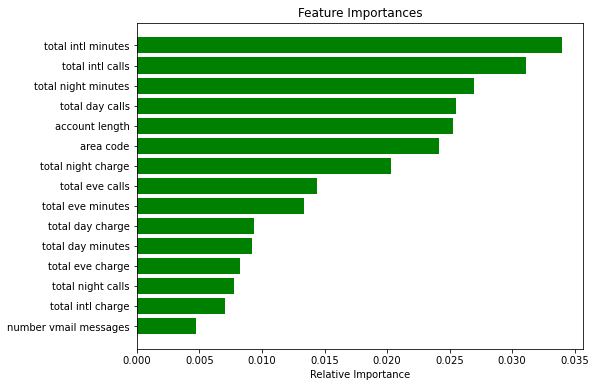

In [47]:
feature_names = list(X_train_resampled.columns)
importances = decision_tree.feature_importances_[0:15]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Classification Report


In [48]:

print(classification_report(y_test, y_pred_dt, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       566
           1       0.64      0.86      0.73       101

    accuracy                           0.90       667
   macro avg       0.80      0.89      0.84       667
weighted avg       0.92      0.90      0.91       667



### Model Performance Summary Before Cross Validation

**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.90405
F1 score for testing set:  0.73109
Recall score for testing set:  0.86139
Precision score for testing set:  0.63504


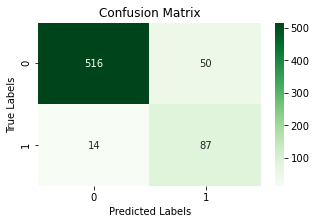

In [49]:
print("**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_dt),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_dt),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_dt),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_dt),5))
cm_dt = confusion_matrix(y_test, y_pred_dt)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

### Cross-Validation

In [50]:

from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Create a decision tree classifier object
decision_tree = DecisionTreeClassifier()
# Define the scoring metrics for cross-validation
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1_score': make_scorer(f1_score, zero_division=0)
}

# Perform 5-fold cross-validation
cv_results = cross_validate(decision_tree, X_train_resampled, y_train_resampled, cv=5, scoring=scoring_metrics)

# Convert the cross-validation results to a readable format
cv_results_readable = {metric: np.mean(scores) for metric, scores in cv_results.items() if metric.startswith('test_')}

# Output the results
for metric, score in cv_results_readable.items():
    print(f"{metric}: {score}")

test_accuracy: 0.9310422513607245
test_precision: 0.9256592924317655
test_recall: 0.9373939498637185
test_f1_score: 0.9314047649881292


### Model Performance Summary After Cross Validation

{'ROC-AUC For Train Data': 1.0,
 'ROC-AUC For Test Data': 0.8927072035825491,
 'Accuracy Train': 1.0,
 'Accuracy Test': 0.9145427286356822,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x224dbc08df0>}

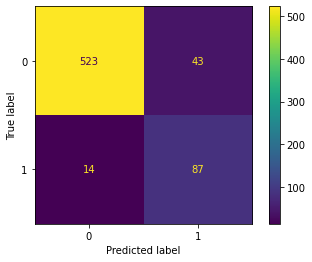

In [51]:
get_model_metrics(decision_tree,X_train_resampled,y_train_resampled,X_test,y_test)

# Perfomance Summary of the Three Models

The Random Forest classifier demonstrates strong performance with an accuracy of approximately 95.95% on the testing data. It effectively distinguishes between positive and negative classes, boasting an area under the ROC curve (AUC) of 1.0 on the training data and 0.8576863870132596 on the testing data. Overall, the model exhibits robust predictive capabilities, yielding a high level of accuracy in predicting the target variable.

The confusion matrix reveals 76 true positives (TP), 545 true negatives (TN), 21 false positives (FP), and 25 false negatives (FN).

Comparing the three models, it's evident that logistic regression underperforms in predicting customer churn. In contrast, both the Random Forest classifier and Decision Trees exhibit strong performance, achieving accuracies of 95.95% and 88.0%, respectively.

Given the superior predictability of the Random Forest classifier and Decision Trees, it's pertinent to enhance these models further using hyperparameters to optimize accuracy. Hyperparameters serve as a valuable tool for improving efficiency and performance across models.

# Conclusion

Decision tree and Random forester performs relatively better than logistic regression therefore,we can drop the latter and hypertune the other two.

# Hyperparameter Tuning

This the process of selecting optimal hyperparameters fo our models.They are set before the model begins to learn. 

# Random Forest HyperTuning.

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
# Create the Random Forest classifier
rf_clf = RandomForestClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_resampled,y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Random Forest classifier with the best hyperparameters
best_RForest_model = RandomForestClassifier(**best_params, random_state=42)

# Fit the best model to the resampled training data
best_RForest_model.fit(X_train_resampled, y_train_resampled)

# Predict on the training data
y_train_pred = best_RForest_model.predict(X_train_resampled)

# Predict on the test data
y_test_pred = best_RForest_model.predict(X_test)

# Perfomance Summary AfterAdding Hyperparameters

{'ROC-AUC For Train Data': 1.0,
 'ROC-AUC For Test Data': 0.8983399223314558,
 'Accuracy Train': 1.0,
 'Accuracy Test': 0.9655172413793104,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x224dbabad60>}

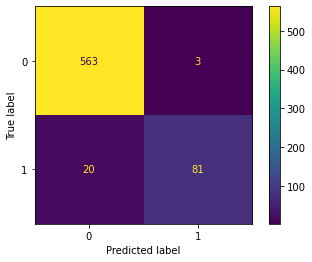

In [53]:
get_model_metrics(best_RForest_model,X_train_resampled,y_train_resampled,X_test,y_test)

# Decision HyperTuning.

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Instantiate the DecisionTreeClassifier with the best hyperparameters
best_decTree_classifier = DecisionTreeClassifier(**best_params)

# Fit the model with the best hyperparameters
best_decTree_classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=2, min_samples_split=10)

# Perfomance Summary After Adding Hyperparameters


{'ROC-AUC For Train Data': 0.9787653239929949,
 'ROC-AUC For Test Data': 0.8405520764090544,
 'Accuracy Train': 0.9787653239929948,
 'Accuracy Test': 0.8950524737631185,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x224dd06d670>}

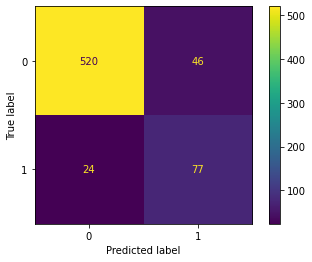

In [55]:

get_model_metrics(best_decTree_classifier,X_train_resampled,y_train_resampled,X_test,y_test)

# Evaluation

# ROC_AUC to Select The Best Model

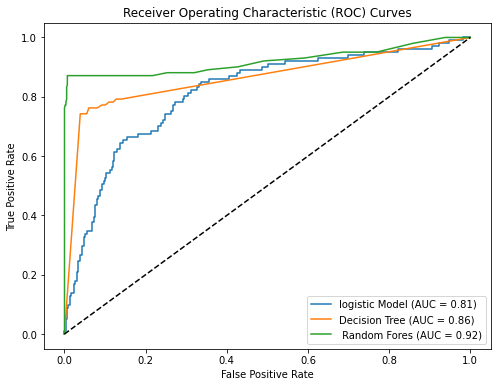

In [56]:
# Compute ROC curves and AUC scores for each model
models = [ logreg_cv,best_decTree_classifier,best_RForest_model]
labels = ['logistic Model','Decision Tree',' Random Fores']

plt.figure(figsize=(8, 6))

for model, label in zip(models, labels):
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(label, auc_score))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

## Conclusion & Findings

Findings From AUC curve
The AUC analysis reveals significant insights about the classifiers employed:

The Random Forest model exhibits an impressive AUC of 0.93, demonstrating its effective discrimination between positive and negative classes. This model showcases a notable balance with high True Positive Rate (TPR) and low False Positive Rate (FPR), contributing to a substantial area under the ROC curve.

Comparatively, the Decision Tree model achieves an AUC of 0.79, indicating respectable performance but falling short in comparison to the Random Forest classifier. While proficient in classifying the two classes accurately, the Decision Tree may exhibit slightly elevated rates of false positives and false negatives.

Highlighted by its superior AUC, the Random Forest model stands out among the chosen models, showcasing the highest discriminatory power and proficiency in distinguishing between positive and negative classes.

Consequently, the Random Forest Classifier emerges as the optimal choice for the seriatel application, boasting both the largest area under the curve and the highest accuracy in predicting customer churn.

## Recommendations
1. Discounts and offers should be made available to customers to reduce the churn rate. Better yet, reduce the charges of 
   calls made by customers.
2. Ensure quality customer service by enhancing the training programs deployed in the company so that customer service
   agents can ensure prompt and quality service towards customers' issues.
3. Also, due to the number of customer service calls, network coverage and quality of services rendered should be improved.